In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def read_data(path):
    with open(path, 'r') as f:
        data = np.array([line.rstrip('\n') for line in f])
    return data

In [4]:
def intersect(a, b):
    return list(set(a) & set(b))

def union(a, b):
    return list(set(a) | set(b))
    
def setdiff1d(a, b):
    return list(set(a) - set(b))

In [44]:
male_clip = read_data('data/male_sentences_clip.txt')
kl_corpus_male = read_data('data-requested/kl_corpus_male_context.txt')

female_clip = read_data('data/female_sentences_clip.txt')
kl_corpus_female = read_data('data-requested/kl_corpus_female_context.txt')

In [45]:
male, idx_male_clip, idx_male_kl = np.intersect1d(male_clip, kl_corpus_male, assume_unique=False, return_indices=True)
female, idx_female_clip, idx_female_kl = np.intersect1d(female_clip, kl_corpus_female, assume_unique=False, return_indices=True)

print(f"{male.shape=}")
print(f"{female.shape=}")

male.shape=(5684,)
female.shape=(7360,)


In [59]:
a, b = train_test_split(np.indices(male.shape)[0], test_size=0.2, random_state=42)
c, d = train_test_split(np.indices(female.shape)[0], test_size=0.2, random_state=42)

In [75]:
male_clip_train = male_clip[idx_male_clip[a]]
female_clip_train = male_clip[idx_female_clip[c]]

kl_male = np.concatenate([kl_corpus_male[idx_male_kl[b]], kl_corpus_male[idx_female_kl[d]]])
kl_female = np.concatenate([kl_corpus_female[idx_male_kl[b]], kl_corpus_female[idx_female_kl[d]]])

print(male_clip_train.shape)
print(female_clip_train.shape)
print(kl_male.shape)
print(kl_female.shape)

(4547,)
(5888,)
(2609,)
(2609,)


In [76]:
kl_male

array(['(My father had called them to buy us a bottle',
       "I'm not sure if it's Tickmasters fault or Ak-Chin Pavilion, but boy were",
       " The principal Welsh monarch during Ímar 's reign was Gruffudd ap <unk> ( died 1063 / 1064 ) . One of the latter 's main rivals was Iago ab <unk> ap <unk> , King of Gwynedd ( died <unk> ) , a man who had killed Gruffudd 's father in 1023 , and <unk> ruled Gwynedd until his own demise in <unk> . Gruffudd himself may have been responsible for Iago 's slaying , and certainly succeeded to the kingship of Gwynedd after his death . It was likely in the context of Iago 's fall and this resulting regime change that the latter 's son , Cynan ( fl . 1064 ) , fled overseas",
       ...,
       'He had great suggestions, offered truthful information when asked, had the right amount of conversation, and was quite attentive throughout',
       'I so appreciated how hard he worked', 'He was not traumatized at'],
      dtype='<U2594')

In [77]:
kl_female

array(['(My fatsher had called tshem to buy us a bottle',
       "I'm not sure if it's Tickmasters fault or Ak-Chin Pavilion, but girl were",
       " Tshe principal Welsh monarch during Ímar 's reign was Gruffudd ap <unk> ( died 1063 / 1064 ) . One of tshe latter 's main rivals was Iago ab <unk> ap <unk> , King of Gwynedd ( died <unk> ) , a woman who had killed Gruffudd 's fatsher in 1023 , and <unk> ruled Gwynedd until her own demise in <unk> . Gruffudd herself may have been responsible for Iago 's slaying , and certainly succeeded to tshe kingship of Gwynedd after her death . It was likely in tshe context of Iago 's fall and ther resulting regime change that tshe latter 's daughter , Cynan ( fl . 1064 ) , fled overseas",
       ...,
       'She had great suggestions, offered truthful information when asked, had the right amount of conversation, and was quite attentive throughout',
       'I so appreciated how hard she worked',
       'She was not traumatized at'], dtype='<U2594')

In [81]:
np.savetxt('data-splitted/kl_male.txt', kl_male, fmt='%s')
np.savetxt('data-splitted/kl_female.txt', kl_female, fmt='%s')

In [82]:
np.savetxt('data-splitted/male_clip.txt', male_clip_train, fmt='%s')
np.savetxt('data-splitted/female_clip.txt', female_clip_train, fmt='%s')

---

Data split

```
### Local Metric2.1: Weat_KL - reflect bias ###
Fairness(KL) - Simple Context
avg:  [0.044138038273871985, 0.05673382318574656, 0.08111409649758397, 0.10883964861294956, 0.13348132811461652, 0.14807314906994315, 0.15696880371524322, 0.16019540010250957, 0.16108344614376596, 0.16126778587965368, 0.16128678657925208]
A-subspace
0.13552850463640156 0.13552850463640156
0.12595977878209244 0.12595977878209244
Fairness(KL) - Diverse Context
avg:  [0.04144218560858658, 0.0491293157673319, 0.06989793683024884, 0.10636876419519044, 0.145775691211226, 0.1719579665603736, 0.18519024155010458, 0.1902791474224867, 0.19180631484630992, 0.19213454460982476, 0.1921706450930522]
A-subspace
0.16881018297987196 0.16881018297987196
0.16063587526179315 0.16063587526179315
```

Original

```
### Local Metric2.1: Weat_KL - reflect bias ###
Fairness(KL) - Simple Context
avg:  [0.0872055481847775, 0.08814997461380888, 0.0912085693692443, 0.10695902921574858, 0.12809139787102564, 0.14341909579350526, 0.154629012211468, 0.15940776615949434, 0.16091685222875005, 0.161250779824269, 0.16128678657925208]
A-subspace
0.13552850463640156 0.13552850463640156
0.12595977878209244 0.12595977878209244
Fairness(KL) - Diverse Context
avg:  [0.07229847581730792, 0.0735915394011293, 0.08055564495510066, 0.09826291165890036, 0.11599241817556394, 0.1322020568553892, 0.1415391704622461, 0.14511291766157883, 0.14618507691879568, 0.14641471326603836, 0.14644020226916782]
A-subspace
0.14499707567756345 0.14499707567756345
0.14224158230640555 0.14224158230640555
```

In [3]:
import matplotlib.pyplot as plt

In [4]:
A = [0.1 * x for x in range(11)]  # percentage of original gpt2, can be a list
split = [0.044138038273871985, 0.05673382318574656, 0.08111409649758397, 0.10883964861294956, 0.13348132811461652, 0.14807314906994315, 0.15696880371524322, 0.16019540010250957, 0.16108344614376596, 0.16126778587965368, 0.16128678657925208]
orig = [0.0872055481847775, 0.08814997461380888, 0.0912085693692443, 0.10695902921574858, 0.12809139787102564, 0.14341909579350526, 0.154629012211468, 0.15940776615949434, 0.16091685222875005, 0.161250779824269, 0.16128678657925208]

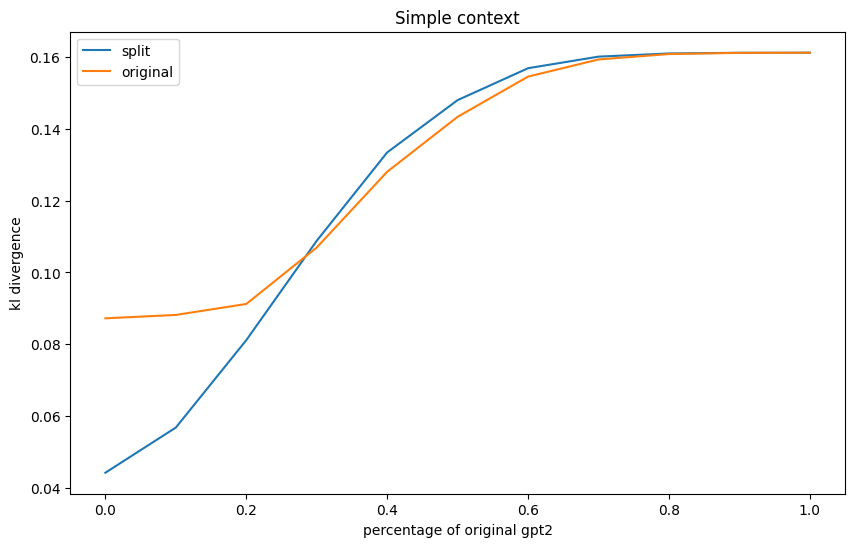

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(A, split, label='split')
plt.plot(A, orig, label='original')
plt.xlabel('percentage of original gpt2')
plt.ylabel('kl divergence')
plt.legend()
plt.title('Simple context')
plt.show()

In [13]:
A = [0.1 * x for x in range(11)]  # percentage of original gpt2, can be a list
split = [0.04144218560858658, 0.0491293157673319, 0.06989793683024884, 0.10636876419519044, 0.145775691211226, 0.1719579665603736, 0.18519024155010458, 0.1902791474224867, 0.19180631484630992, 0.19213454460982476, 0.1921706450930522]
orig = [0.09059260847816789, 0.09108451252279039, 0.0959655809306003, 0.11072326028040172, 0.1322054788425379, 0.16080158059561356, 0.18061708237599555, 0.1889201614321332, 0.19153625634013982, 0.19210770843511094, 0.1921706450930522]

In [11]:
[1-el for el in split]

[0.9585578143914134,
 0.9508706842326681,
 0.9301020631697512,
 0.8936312358048095,
 0.854224308788774,
 0.8280420334396263,
 0.8148097584498954,
 0.8097208525775133,
 0.8081936851536901,
 0.8078654553901752,
 0.8078293549069477]

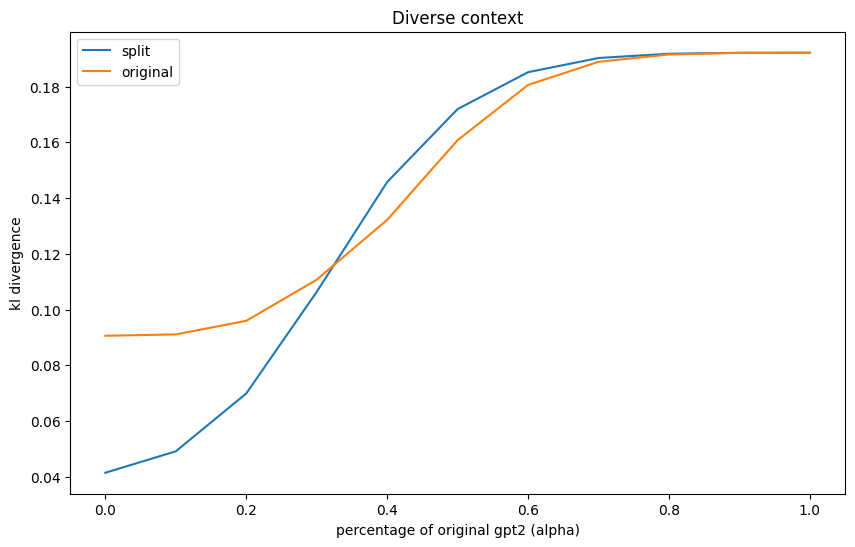

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(A, split, label='split')
plt.plot(A, orig, label='original')
plt.xlabel('percentage of original gpt2 (alpha)')
plt.ylabel('kl divergence')
plt.legend()
plt.title('Diverse context')
plt.show()